### import

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# hi

### Data

In [2]:
data = pd.read_csv("telemetry_2021fall.csv", na_values=np.nan)
codebook = pd.read_excel("codeSpark_telemetry_codebook.xlsx")
df_nonan = data.dropna()
df_nonan.shape

(0, 33)

In [3]:
data.head()

,index,childId,date,time,chapter,level,session,serialNumber,attempt,trial,...,solType,repoBefore,repoAfter,repoBeforeEdit,repoAfterEdit,avtxyz,pathDist2opt,step,inxOptPath,stepsOptPath
0,926245,301,2021-09-24,08:11:13,1.0,1.0,2.0,12,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,926244,301,2021-09-24,08:11:13,1.0,1.0,2.0,13,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,926196,301,2021-09-24,08:11:17,1.0,1.0,2.0,14,1.0,1.0,...,1,NaN,['Walk.Right'],NaN,Walk.R,NaN,NaN,NaN,NaN,NaN
3,926169,301,2021-09-24,08:11:19,1.0,1.0,2.0,15,1.0,1.0,...,1,['Walk.Right'],NaN,Walk.R,NaN,"0.00,0.02,0.00",NaN,NaN,NaN,NaN
4,926168,301,2021-09-24,08:11:19,1.0,1.0,2.0,17,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,"0.00,0.02,0.00",0.0,0.0,0.0,2.0


In [4]:
codebook

,Name,Description,Rule or Formula,Values
0,index,unique row number created in python,NaN,NaN
1,childId,Internal Child ID,internal mapping,100-199: data collection 2019-20\n200-299: dat...
2,chapter,codeSpark chapter,as defined by codeSpark,1: Donut Detective Chapter\n2: ...\n3: ...\n4:...
3,level,codeSpark level,as defined by codeSpark,"1-19, each chapter has a different number of l..."
4,session,codeSpark session,as defined by codeSpark: a session starts at a...,"1, 2, 3 .."
5,attempt,"Part of a session, an attempt includes startin...",starts at PuzzleStart\nends at PuzzleResult,"1, 2, 3 .. (starts at 1 for each session)"
6,trial,Part of an attempt. Each edit/execute sequence...,starts at PuzzleStart\nends at [EndExecuteTrig...,"1, 2, 3 .. (starts at 1 for each attempt)"
7,vidTimeHMS,Timestamps used to link the gameplay telemetry...,NaN,NaN
8,time,event time in Pacific Time in format HH:mm:ss,NaN,NaN
9,date,event data in format YYYY-MM-DD,NaN,NaN


In [5]:
data.shape

(401940, 33)

In [6]:
data.columns

Index(['index', 'childId', 'date', 'time', 'chapter', 'level', 'session',
       'serialNumber', 'attempt', 'trial', 'pause_s', 'sessionTimestamp',
       'sms', 'eventDescription', 'param', 'avtPos', 'distChange',
       'dist2optMax', 'dist2optBefore', 'dist2optAfter', 'nofCmdsBest',
       'nofCmdsBefore', 'nofCmdsAfter', 'solType', 'repoBefore', 'repoAfter',
       'repoBeforeEdit', 'repoAfterEdit', 'avtxyz', 'pathDist2opt', 'step',
       'inxOptPath', 'stepsOptPath'],
      dtype='object')

In [7]:
# dealing with NaN
data.isnull().sum()

index                    0
childId                  0
date                     0
time                     0
chapter                216
level                  216
session                  0
serialNumber             0
attempt                  0
trial                    0
pause_s                747
sessionTimestamp         0
sms                      0
eventDescription         0
param               264916
avtPos               78574
distChange          299980
dist2optMax         299980
dist2optBefore      299980
dist2optAfter       299980
nofCmdsBest         299980
nofCmdsBefore       299980
nofCmdsAfter        299980
solType             284333
repoBefore          272059
repoAfter           303233
repoBeforeEdit      272059
repoAfterEdit       303233
avtxyz              137242
pathDist2opt        280450
step                280450
inxOptPath          280450
stepsOptPath        280450
dtype: int64

In [8]:
df = data.copy()

In [9]:
df.drop(columns = ['index', 'param', 'avtPos', 'distChange',
       'dist2optMax', 'dist2optBefore', 'dist2optAfter', 'nofCmdsBest',
       'nofCmdsBefore', 'nofCmdsAfter', 'solType', 'repoBefore', 'repoAfter',
       'repoBeforeEdit', 'repoAfterEdit', 'avtxyz', 'pathDist2opt', 'step',
       'inxOptPath', 'stepsOptPath'], inplace = True)

In [10]:
df.head()

,childId,date,time,chapter,level,session,serialNumber,attempt,trial,pause_s,sessionTimestamp,sms,eventDescription
0,301,2021-09-24,08:11:13,1.0,1.0,2.0,12,0.0,1.0,NaN,767832.907,0.0,PuzzleIntroDone
1,301,2021-09-24,08:11:13,1.0,1.0,2.0,13,1.0,1.0,0.1,767841.254,0.0,PuzzleStart
2,301,2021-09-24,08:11:17,1.0,1.0,2.0,14,1.0,1.0,3.8,771640.313,3.8,CommandAdded
3,301,2021-09-24,08:11:19,1.0,1.0,2.0,15,1.0,1.0,2.0,773623.663,5.8,StartExecuteTrigger
4,301,2021-09-24,08:11:19,1.0,1.0,2.0,17,1.0,1.0,0.2,773751.507,5.9,ExecuteTriggerCommand


In [1]:
df["eventDescription"].unique()
# time series
# how command added happens? 
# aggregation and groupby data....
# write about proposal and hypothesis and expectations
# feature analysis - indicators? intentions? 
# expentation meets or no? prediction? computer applications? understandings of the work
# conference
# ACM conference for cs
# intuitions of the work
# sequenctial analysis, patterns
# recurring neuronetworks
# variational ordering 
# game user data time series

NameError: name 'df' is not defined

In [11]:
codebook.head(2)
codebook = codebook.T

new_header = codebook.iloc[0] #grab the first row for the header
codebook.columns = new_header #set the header row as the df header

codebook[['childId',
 'date',
 'time',
 'chapter',
 'level',
 'session',
#  'serialNumber',
 'attempt',
 'trial',
 'pause_s',
#  'sessionTimestamp',
 'sms']]
#  'eventDescription']]

Name,childId,date,time,chapter,level,session,attempt,trial,pause_s,sms
Name,childId,date,time,chapter,level,session,attempt,trial,pause_s,sms
Description,Internal Child ID,event data in format YYYY-MM-DD,event time in Pacific Time in format HH:mm:ss,codeSpark chapter,codeSpark level,codeSpark session,"Part of a session, an attempt includes startin...",Part of an attempt. Each edit/execute sequence...,NaN,NaN
Rule or Formula,internal mapping,NaN,NaN,as defined by codeSpark,as defined by codeSpark,as defined by codeSpark: a session starts at a...,starts at PuzzleStart\nends at PuzzleResult,starts at PuzzleStart\nends at [EndExecuteTrig...,NaN,NaN
Values,100-199: data collection 2019-20\n200-299: dat...,NaN,NaN,1: Donut Detective Chapter\n2: ...\n3: ...\n4:...,"1-19, each chapter has a different number of l...","1, 2, 3 ..","1, 2, 3 .. (starts at 1 for each session)","1, 2, 3 .. (starts at 1 for each attempt)",NaN,NaN


In [12]:
df.head()

,childId,date,time,chapter,level,session,serialNumber,attempt,trial,pause_s,sessionTimestamp,sms,eventDescription
0,301,2021-09-24,08:11:13,1.0,1.0,2.0,12,0.0,1.0,NaN,767832.907,0.0,PuzzleIntroDone
1,301,2021-09-24,08:11:13,1.0,1.0,2.0,13,1.0,1.0,0.1,767841.254,0.0,PuzzleStart
2,301,2021-09-24,08:11:17,1.0,1.0,2.0,14,1.0,1.0,3.8,771640.313,3.8,CommandAdded
3,301,2021-09-24,08:11:19,1.0,1.0,2.0,15,1.0,1.0,2.0,773623.663,5.8,StartExecuteTrigger
4,301,2021-09-24,08:11:19,1.0,1.0,2.0,17,1.0,1.0,0.2,773751.507,5.9,ExecuteTriggerCommand


In [13]:
df.columns

Index(['childId', 'date', 'time', 'chapter', 'level', 'session',
       'serialNumber', 'attempt', 'trial', 'pause_s', 'sessionTimestamp',
       'sms', 'eventDescription'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401940 entries, 0 to 401939
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   childId           401940 non-null  int64  
 1   date              401940 non-null  object 
 2   time              401940 non-null  object 
 3   chapter           401724 non-null  float64
 4   level             401724 non-null  float64
 5   session           401940 non-null  float64
 6   serialNumber      401940 non-null  int64  
 7   attempt           401940 non-null  float64
 8   trial             401940 non-null  float64
 9   pause_s           401193 non-null  float64
 10  sessionTimestamp  401940 non-null  float64
 11  sms               401940 non-null  float64
 12  eventDescription  401940 non-null  object 
dtypes: float64(8), int64(2), object(3)
memory usage: 39.9+ MB


No handles with labels found to put in legend.


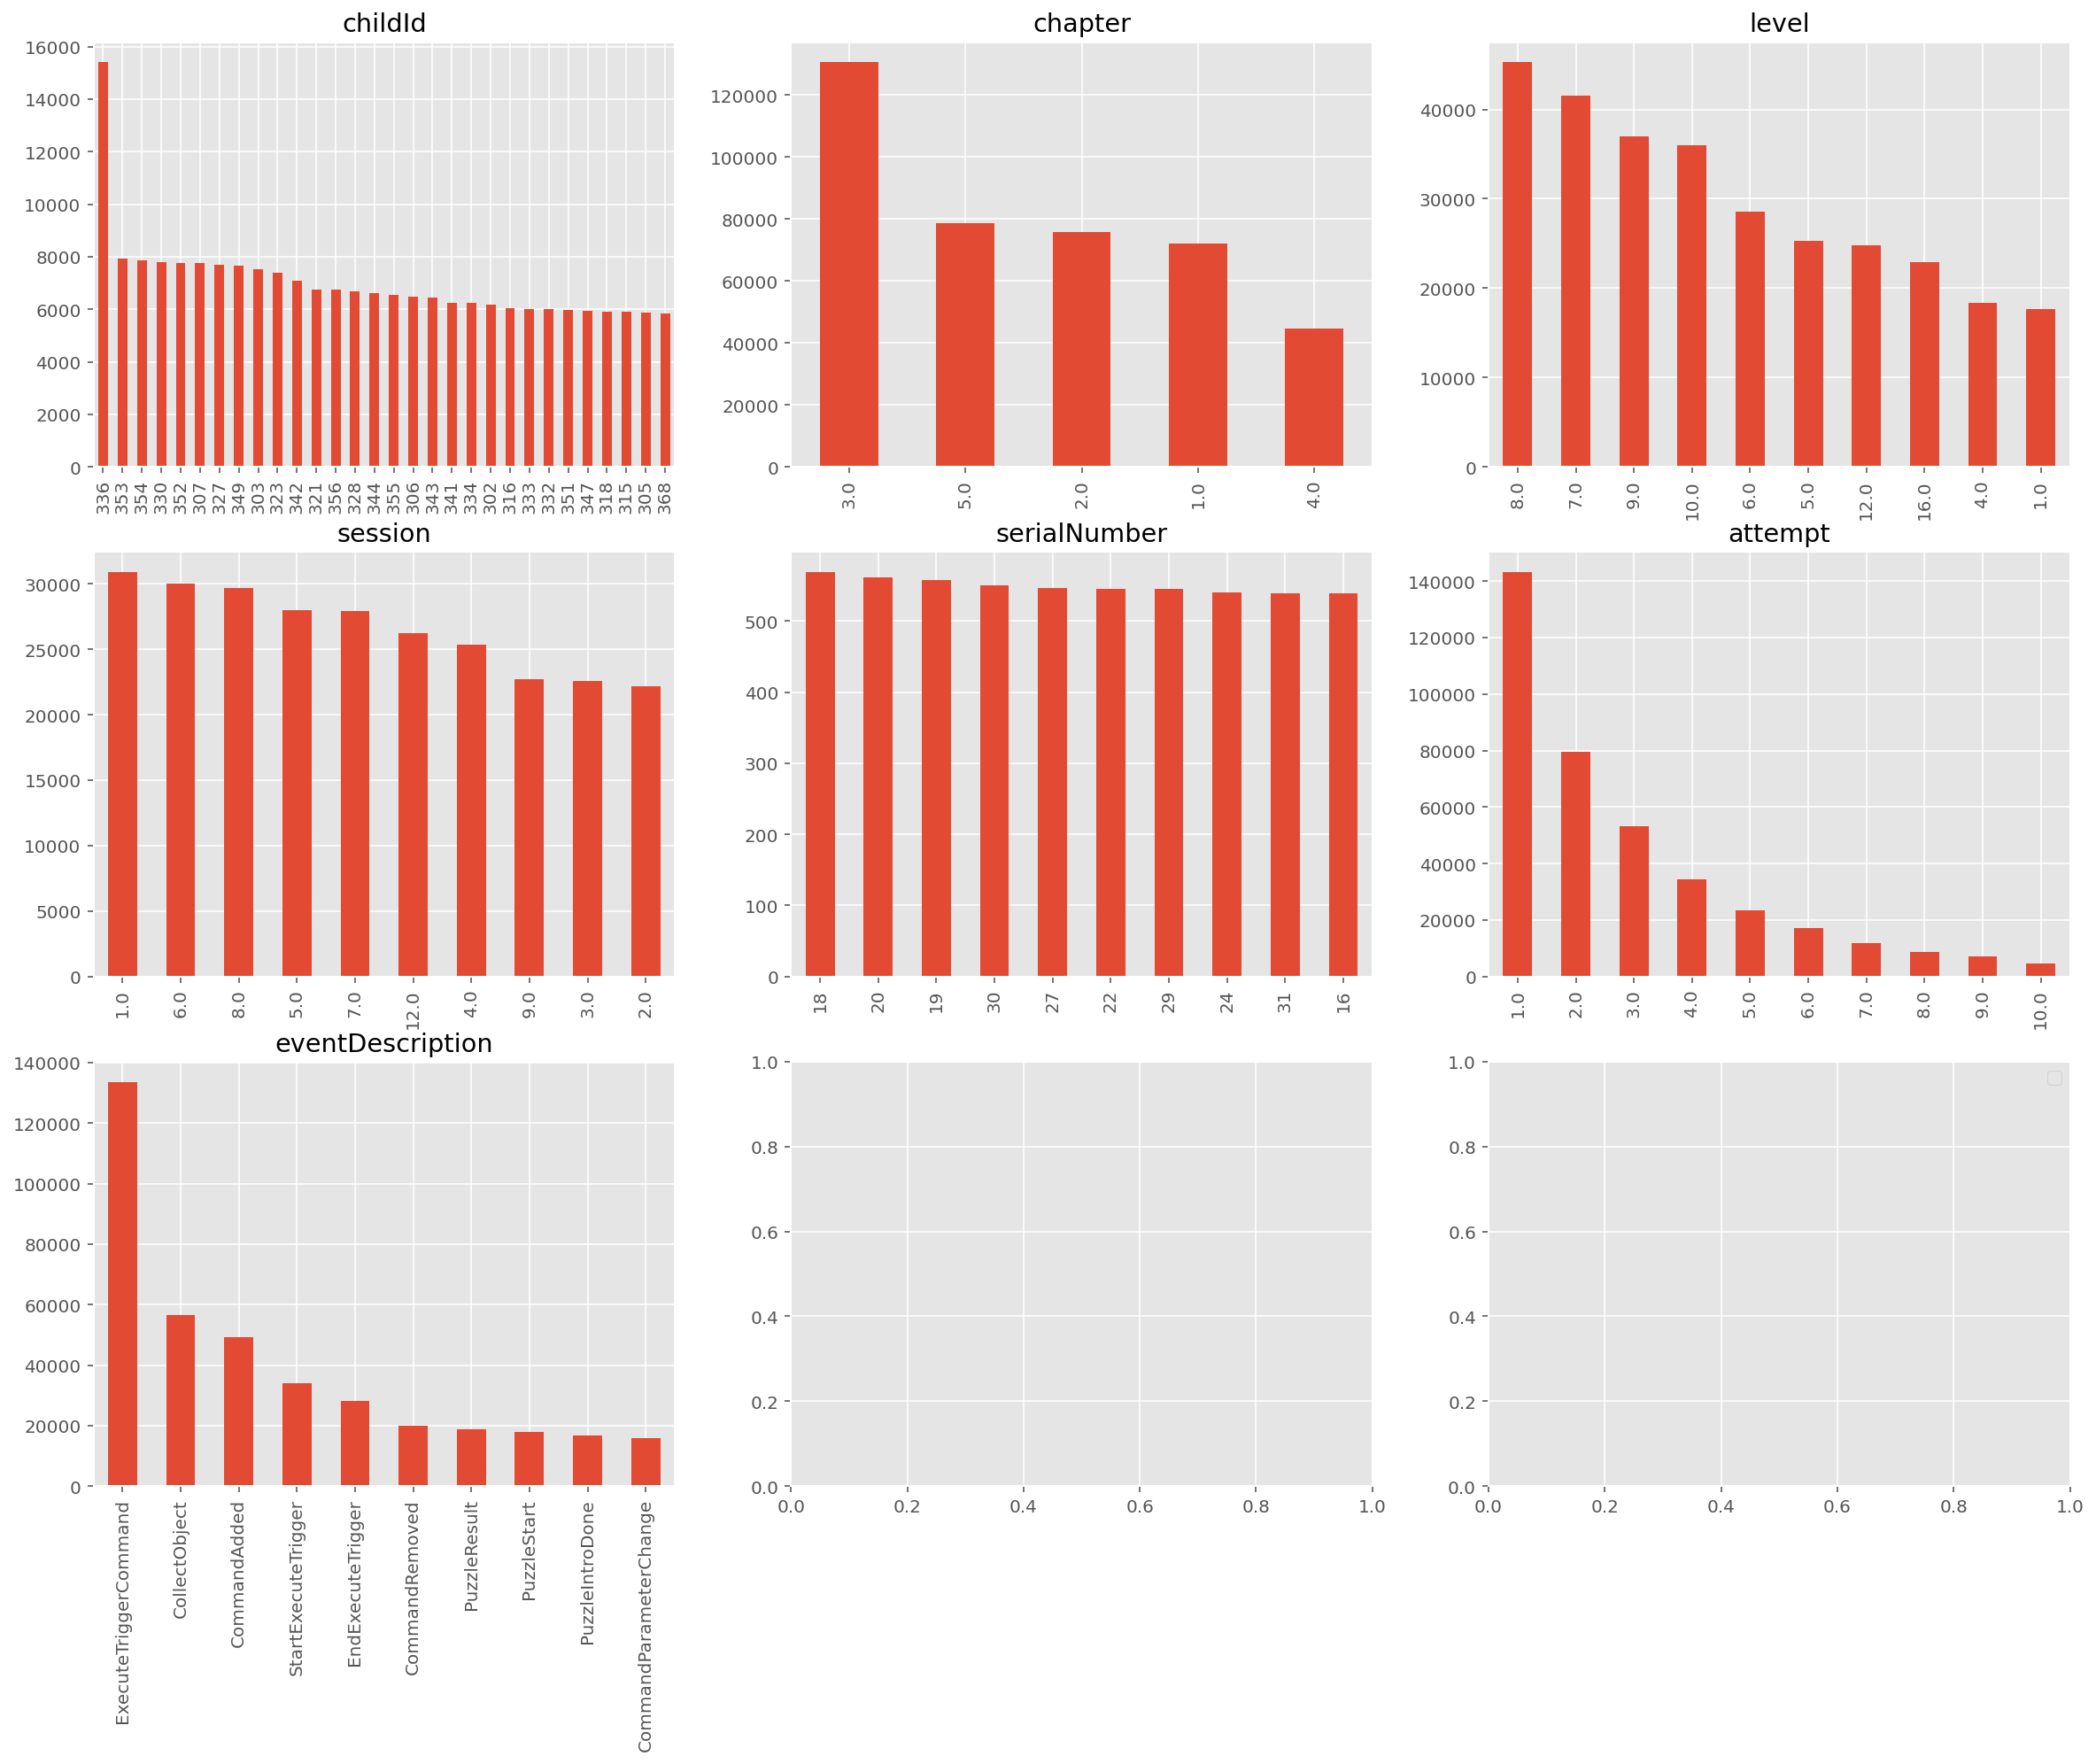

In [15]:
fig, ax = plt.subplots(3, 3, figsize = (20,15))
df['childId'].value_counts().head(30).plot(ax=ax[0][0], kind='bar', title ="childId")
df['chapter'].value_counts().head(10).plot(ax=ax[0][1], kind='bar', title ="chapter")
df['level'].value_counts().head(10).plot(ax=ax[0][2], kind='bar', title ="level")
df['session'].value_counts().head(10).plot(ax=ax[1][0], kind='bar', title ="session")
df['serialNumber'].value_counts().head(10).plot(ax=ax[1][1], kind='bar', title ="serialNumber")
df['attempt'].value_counts().head(10).plot(ax=ax[1][2], kind='bar', title ="attempt")
df['trial'].value_counts().head(10).plot(ax=ax[2][0], kind='bar', title ="trial")
df['pause_s'].value_counts().head(10).plot(ax=ax[2][0], kind='bar', title ="pause_s")
df['sessionTimestamp'].value_counts().head(10).plot(ax=ax[2][0], kind='bar', title ="sessionTimestamp")
df['sms'].value_counts().head(10).plot(ax=ax[2][0], kind='bar', title ="sms")
df['eventDescription'].value_counts().head(10).plot(ax=ax[2][0], kind='bar', title ="eventDescription")
plt.legend()

In [16]:
for col in df.columns:
    print('{} : {} unique values'.format(col, len(df[col].unique())))

childId : 73 unique values
date : 59 unique values
time : 29306 unique values
chapter : 6 unique values
level : 18 unique values
session : 37 unique values
serialNumber : 3527 unique values
attempt : 31 unique values
trial : 197 unique values
pause_s : 1881 unique values
sessionTimestamp : 401894 unique values
sms : 5014 unique values
eventDescription : 15 unique values


In [17]:
df.corr()

,childId,chapter,level,session,serialNumber,attempt,trial,pause_s,sessionTimestamp,sms
childId,1.000000,-0.001792,-0.019957,-0.054747,-0.040690,-0.002106,0.023609,0.000428,0.011545,0.035055
chapter,-0.001792,1.000000,-0.301134,0.438380,0.124679,-0.074157,0.202468,0.001656,0.018513,0.109622
level,-0.019957,-0.301134,1.000000,0.148301,0.171309,0.194511,0.066577,-0.001268,0.001426,0.014195
session,-0.054747,0.438380,0.148301,1.000000,0.045573,0.044966,0.070258,0.002656,0.018098,0.050370
serialNumber,-0.040690,0.124679,0.171309,0.045573,1.000000,0.250510,0.197868,0.007417,0.210580,0.017144
attempt,-0.002106,-0.074157,0.194511,0.044966,0.250510,1.000000,0.608226,-0.001013,-0.000575,-0.045878
trial,0.023609,0.202468,0.066577,0.070258,0.197868,0.608226,1.000000,-0.002124,0.012039,0.054111
pause_s,0.000428,0.001656,-0.001268,0.002656,0.007417,-0.001013,-0.002124,1.000000,0.002465,0.102262
sessionTimestamp,0.011545,0.018513,0.001426,0.018098,0.210580,-0.000575,0.012039,0.002465,1.000000,0.037832
sms,0.035055,0.109622,0.014195,0.050370,0.017144,-0.045878,0.054111,0.102262,0.037832,1.000000


In [18]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

<AxesSubplot:>

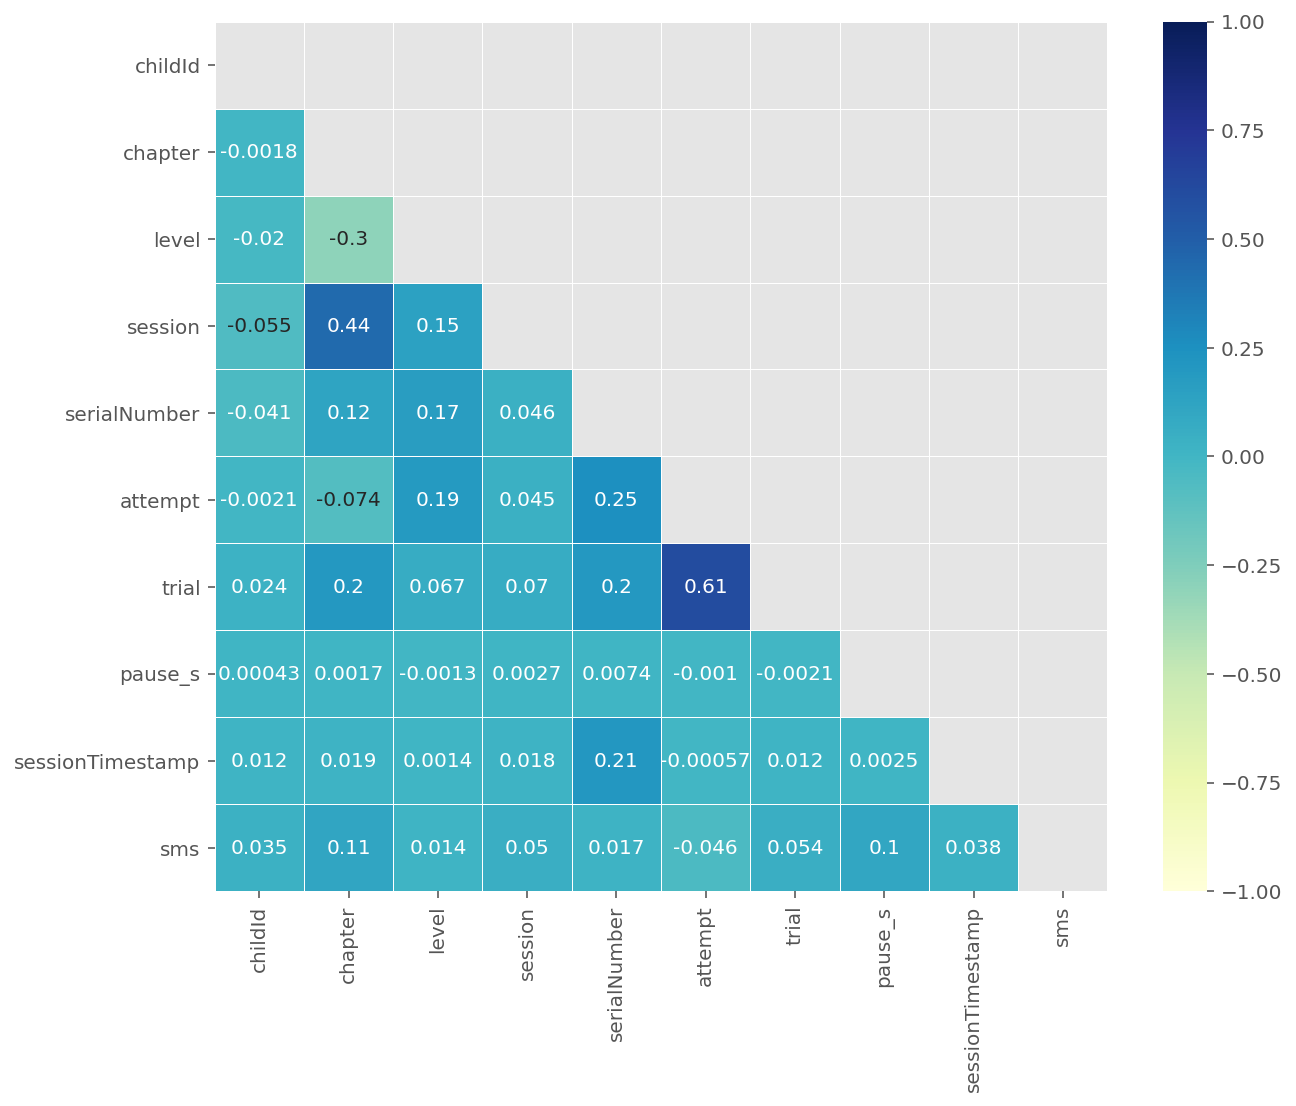

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),
            mask = mask, 
            cmap="YlGnBu",
            vmax=1,
            vmin=-1,
            annot=True,
            linewidths=.5,
            robust=True)

In [20]:
df.describe()

,childId,chapter,level,session,serialNumber,attempt,trial,pause_s,sessionTimestamp,sms
count,401940.000000,401724.000000,401724.000000,401940.000000,401940.000000,401940.000000,401940.000000,401193.000000,4.019400e+05,401940.000000
mean,336.124740,2.954583,8.740528,9.085903,569.799005,3.331910,5.911524,2.669337,5.972308e+06,40.422841
std,20.629026,1.341191,4.214405,6.058567,454.948680,3.269508,9.107191,134.463705,4.478524e+07,76.177501
min,301.000000,1.000000,1.000000,1.000000,5.000000,0.000000,1.000000,-51071.500000,3.694718e+03,-71.300000
25%,319.000000,2.000000,6.000000,4.000000,221.000000,1.000000,1.000000,0.300000,3.886030e+05,11.700000
50%,336.000000,3.000000,8.000000,8.000000,474.000000,2.000000,3.000000,0.900000,8.204919e+05,24.500000
75%,353.000000,4.000000,12.000000,13.000000,813.000000,4.000000,7.000000,1.900000,1.363857e+06,46.300000
max,373.000000,5.000000,17.000000,42.000000,6184.000000,30.000000,197.000000,24109.300000,6.246702e+08,13421.600000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401940 entries, 0 to 401939
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   childId           401940 non-null  int64  
 1   date              401940 non-null  object 
 2   time              401940 non-null  object 
 3   chapter           401724 non-null  float64
 4   level             401724 non-null  float64
 5   session           401940 non-null  float64
 6   serialNumber      401940 non-null  int64  
 7   attempt           401940 non-null  float64
 8   trial             401940 non-null  float64
 9   pause_s           401193 non-null  float64
 10  sessionTimestamp  401940 non-null  float64
 11  sms               401940 non-null  float64
 12  eventDescription  401940 non-null  object 
dtypes: float64(8), int64(2), object(3)
memory usage: 39.9+ MB


In [22]:
df.head(2)

,childId,date,time,chapter,level,session,serialNumber,attempt,trial,pause_s,sessionTimestamp,sms,eventDescription
0,301,2021-09-24,08:11:13,1.0,1.0,2.0,12,0.0,1.0,NaN,767832.907,0.0,PuzzleIntroDone
1,301,2021-09-24,08:11:13,1.0,1.0,2.0,13,1.0,1.0,0.1,767841.254,0.0,PuzzleStart


<AxesSubplot:>

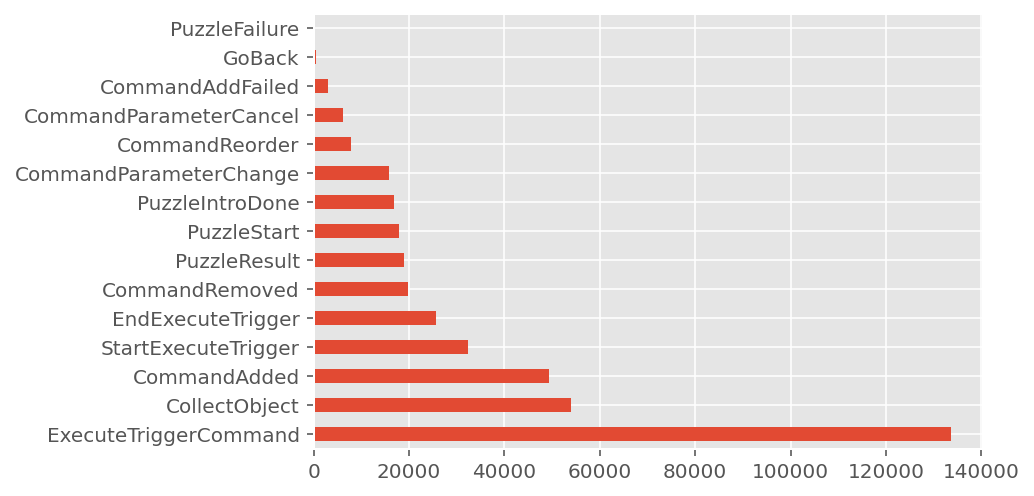

In [23]:
df['eventDescription'].value_counts().plot(kind = 'barh')

In [24]:
# #Creating the dataset
# df = sns.load_dataset('titanic') 
# df=df.groupby('who')['fare'].sum().to_frame().reset_index()

# #Creating the bar chart 
# plt.barh(df['who'],df['fare'],color = ['#F0F8FF','#E6E6FA','#B0E0E6']) 

# #Adding the aesthetics
# plt.title('Chart title')
# plt.xlabel('X axis title')
# plt.ylabel('Y axis title') 

# #Show the plot
# plt.show()

In [25]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df['day'] = pd.DatetimeIndex(df['date']).day

In [26]:
def time_convert(x):
    h,m,s = map(int,x.split(':'))
    return (h*60+m)*60+s

df["seconds"] = df.time.apply(time_convert)

In [27]:
df.drop(columns = ["date", "time"], inplace = True)

In [28]:
df.head()

,childId,chapter,level,session,serialNumber,attempt,trial,pause_s,sessionTimestamp,sms,eventDescription,month,year,day,seconds
0,301,1.0,1.0,2.0,12,0.0,1.0,NaN,767832.907,0.0,PuzzleIntroDone,9,2021,24,29473
1,301,1.0,1.0,2.0,13,1.0,1.0,0.1,767841.254,0.0,PuzzleStart,9,2021,24,29473
2,301,1.0,1.0,2.0,14,1.0,1.0,3.8,771640.313,3.8,CommandAdded,9,2021,24,29477
3,301,1.0,1.0,2.0,15,1.0,1.0,2.0,773623.663,5.8,StartExecuteTrigger,9,2021,24,29479
4,301,1.0,1.0,2.0,17,1.0,1.0,0.2,773751.507,5.9,ExecuteTriggerCommand,9,2021,24,29479


In [29]:
df_dum =  pd.get_dummies(df,
                                 prefix = ["eventDescription"],
                                 columns = ["eventDescription"])

In [30]:
df_dum

,childId,chapter,level,session,serialNumber,attempt,trial,pause_s,sessionTimestamp,sms,...,eventDescription_CommandRemoved,eventDescription_CommandReorder,eventDescription_EndExecuteTrigger,eventDescription_ExecuteTriggerCommand,eventDescription_GoBack,eventDescription_PuzzleFailure,eventDescription_PuzzleIntroDone,eventDescription_PuzzleResult,eventDescription_PuzzleStart,eventDescription_StartExecuteTrigger
0,301,1.0,1.0,2.0,12,0.0,1.0,NaN,767832.907,0.0,...,0,0,0,0,0,0,1,0,0,0
1,301,1.0,1.0,2.0,13,1.0,1.0,0.1,767841.254,0.0,...,0,0,0,0,0,0,0,0,1,0
2,301,1.0,1.0,2.0,14,1.0,1.0,3.8,771640.313,3.8,...,0,0,0,0,0,0,0,0,0,0
3,301,1.0,1.0,2.0,15,1.0,1.0,2.0,773623.663,5.8,...,0,0,0,0,0,0,0,0,0,1
4,301,1.0,1.0,2.0,17,1.0,1.0,0.2,773751.507,5.9,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401935,373,NaN,NaN,25.0,14,0.0,1.0,NaN,68626.549,0.0,...,0,0,0,0,1,0,0,0,0,0
401936,373,NaN,NaN,25.0,19,0.0,1.0,39.5,108053.768,39.4,...,0,0,0,0,1,0,0,0,0,0
401937,373,NaN,NaN,25.0,28,0.0,1.0,96.9,204940.644,136.3,...,0,0,0,0,1,0,0,0,0,0
401938,373,NaN,NaN,27.0,7,0.0,1.0,NaN,74482.675,0.0,...,0,0,0,0,1,0,0,0,0,0


## ML

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error as MSE

In [32]:
df_dum.isna().sum()
df_dum.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401069 entries, 1 to 401933
Data columns (total 29 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   childId                                  401069 non-null  int64  
 1   chapter                                  401069 non-null  float64
 2   level                                    401069 non-null  float64
 3   session                                  401069 non-null  float64
 4   serialNumber                             401069 non-null  int64  
 5   attempt                                  401069 non-null  float64
 6   trial                                    401069 non-null  float64
 7   pause_s                                  401069 non-null  float64
 8   sessionTimestamp                         401069 non-null  float64
 9   sms                                      401069 non-null  float64
 10  month                           

In [33]:
X = df_dum.copy()
y = X.pop('level')

In [34]:
# diving data into trainning and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2, 
    random_state=10)

In [35]:
# standardlize the train/test sets of data
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), 
                       columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), 
                      columns=X_train.columns)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(320855, 28) (320855,)
(80214, 28) (80214,)


### LR

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_cv = cross_val_score(lr, X_train, y_train, cv=5)
print('Cross-validated scores:', lr_cv)
print('Average score:', lr_cv.mean())
print ('Trainning Score:', lr.score(X_train, y_train))
print ('Test Score:', lr.score(X_test, y_test))

Cross-validated scores: [0.27576097 0.279536   0.28280881 0.28113872 0.28685854]
Average score: 0.28122060754060324
Trainning Score: 0.28137946993807883
Test Score: 0.28440826507379835


In [37]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(lr.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef

,coefficients,coef_abs
childId,2.821444e-03,2.821444e-03
chapter,-2.252442e+00,2.252442e+00
session,1.053123e+00,1.053123e+00
serialNumber,8.026439e-01,8.026439e-01
attempt,2.196040e-01,2.196040e-01
trial,2.575339e-01,2.575339e-01
pause_s,-3.994328e-02,3.994328e-02
sessionTimestamp,-1.835884e-01,1.835884e-01
sms,1.464634e-01,1.464634e-01
month,5.597622e-01,5.597622e-01


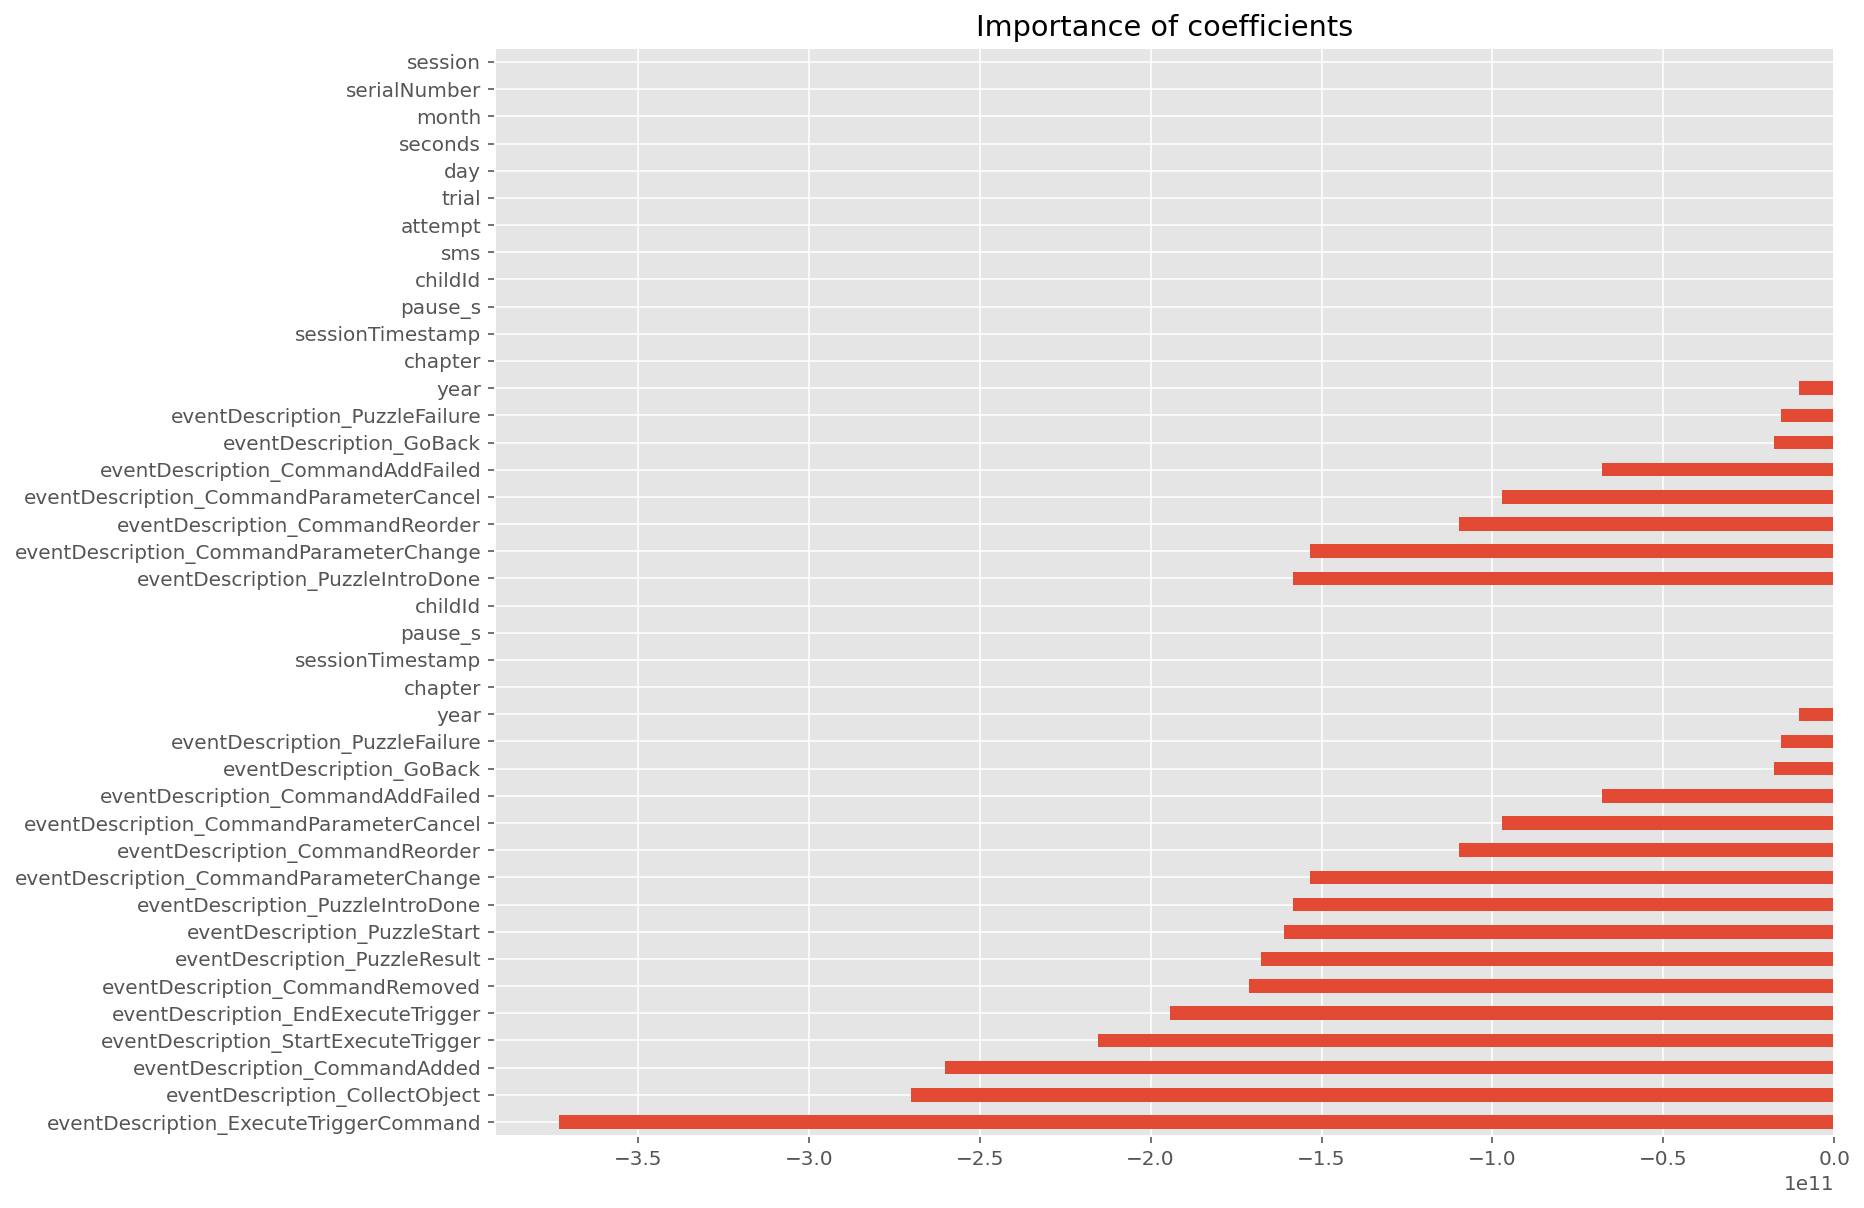

In [38]:
coefs = pd.concat([df_coef['coefficients'].sort_values().head(20),
                     df_coef['coefficients'].sort_values().tail(20)])
coefs.plot(kind = "barh", figsize=(12, 10))
plt.title("Importance of coefficients")
plt.show()

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='level'>

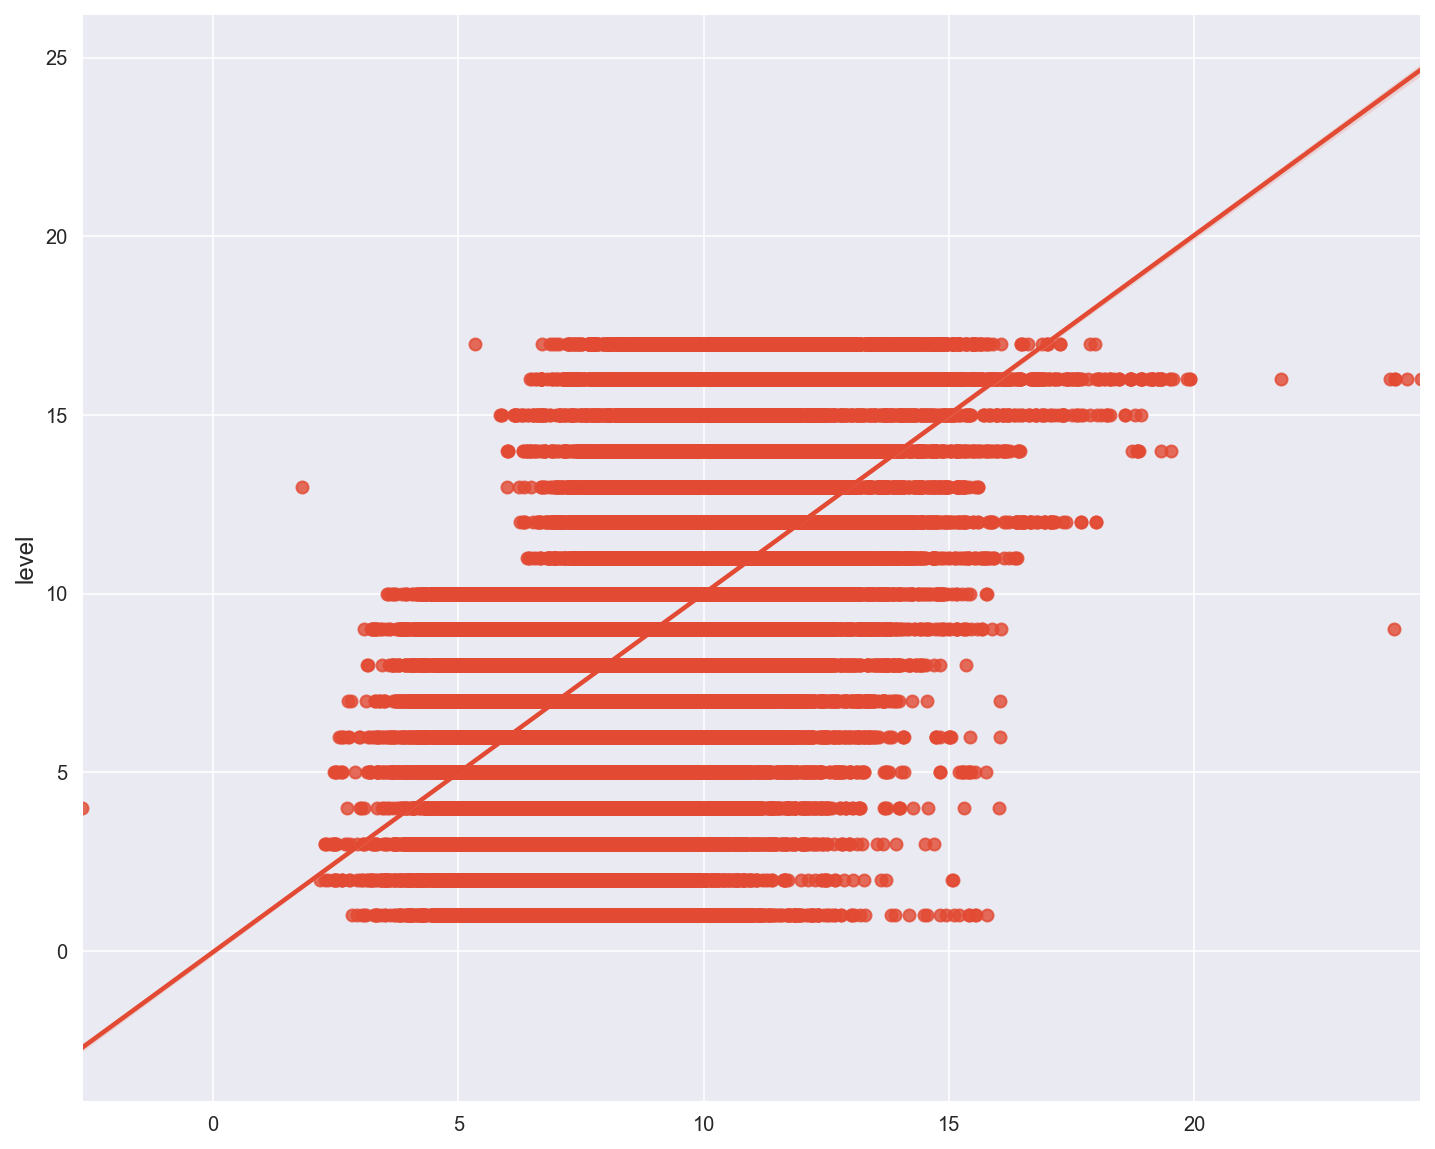

In [39]:
lr_pred = lr.predict(X_test)
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.regplot(lr_pred,y_test)

### Ridge

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

model = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5)
model.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
        cv=5)

In [41]:
alpha = model.alpha_
model = Ridge(alpha=alpha)

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.27576213 0.27953757 0.28280961 0.28113915 0.28685745]
Mean cross-validated training score: 0.2812211814291658
Training Score: 0.2813794953049943
Test Score: 0.28440575490912967


### Lasso

In [42]:
model = LassoCV(alphas=np.logspace(-4, 4, 10), cv=5)
model.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
        cv=5)

In [43]:
alpha = model.alpha_
model = Lasso(alpha=alpha)

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.27576342 0.27953742 0.28281007 0.2811389  0.28685668]
Mean cross-validated training score: 0.2812212995954334
Training Score: 0.2813794813445015
Test Score: 0.2844060840137207


### Elastic net

In [44]:
model = ElasticNetCV(alphas=np.logspace(-4, 4, 10), 
                     l1_ratio=np.array([.1, .5, .7, .9, .95, .99, 1]),
                     cv=5)
# fit the model
model.fit(X_train, y_train)

ElasticNetCV(alphas=array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
             cv=5, l1_ratio=array([0.1 , 0.5 , 0.7 , 0.9 , 0.95, 0.99, 1.  ]))

In [45]:
alpha = model.alpha_
model = ElasticNet(alpha=alpha)

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.2757629  0.27953753 0.28280979 0.28113905 0.28685696]
Mean cross-validated training score: 0.2812212451789896
Training Score: 0.2813794879282355
Test Score: 0.2844057885154402


### Neural net by keras

In [46]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow import keras

In [47]:
model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape = (265,)),
        keras.layers.Flatten(),
        keras.layers.Dense(100, activation="sigmoid"),
        keras.layers.Dense(100, activation="sigmoid"),
        keras.layers.Dense(1,activation="relu")
    ]
)

model.compile(
    loss="mse", 
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
#     metrics=["accuracy"],
)

model.fit(X_train,y_train,epochs=10)

Epoch 1/10


ValueError: in user code:

    /Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 train_step
        y_pred = self(x, training=True)
    /Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:380 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:420 call
        return self._run_internal_graph(
    /Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:556 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 265 but received input with shape (None, 28)
